In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train = pd.read_json('./data/lesson_2_HW_Kaggle/train.json')
train.head()

band_1  \
0  [-27.878361, -27.15416, -28.668615, -29.537971...   
1  [-12.242375, -14.920305, -14.920363, -12.66633...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 75.2+ KB


In [31]:
train.describe()

inc_angle   is_iceberg
count  1471.000000  1604.000000
mean     39.268707     0.469451
std       3.839744     0.499222
min      24.754600     0.000000
25%            NaN     0.000000
50%            NaN     0.000000
75%            NaN     1.000000
max      45.937500     1.000000

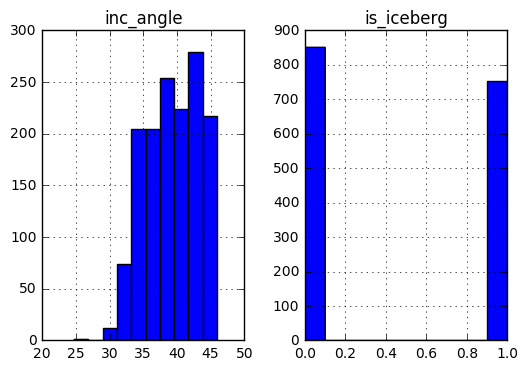

In [34]:
# Balanced dataset of icebergs and ships
train.hist();

### Turn numeric fields numeric

In [10]:
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')
train['is_iceberg'] = pd.to_numeric(train['is_iceberg'],errors='coerce')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1471 non-null float64
is_iceberg    1604 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 75.2+ KB


### Explore Bands and Transform to Images

In [13]:
len(train.band_1[0])

5625

In [14]:
len(train.band_2[0])

5625

In [15]:
len(train.band_1[100])

5625

In [16]:
len(train.band_2[100])

5625

Band data is in a 1D list of length 5625, and we know the images are supposed to be 75x75. Let's take a random sample of iceburgs and ships to plot

In [26]:
icebergs = train[train.is_iceberg==1].sample(n=6)
ships = train[train.is_iceberg==0].sample(n=6)

#### Icebergs: Band_1

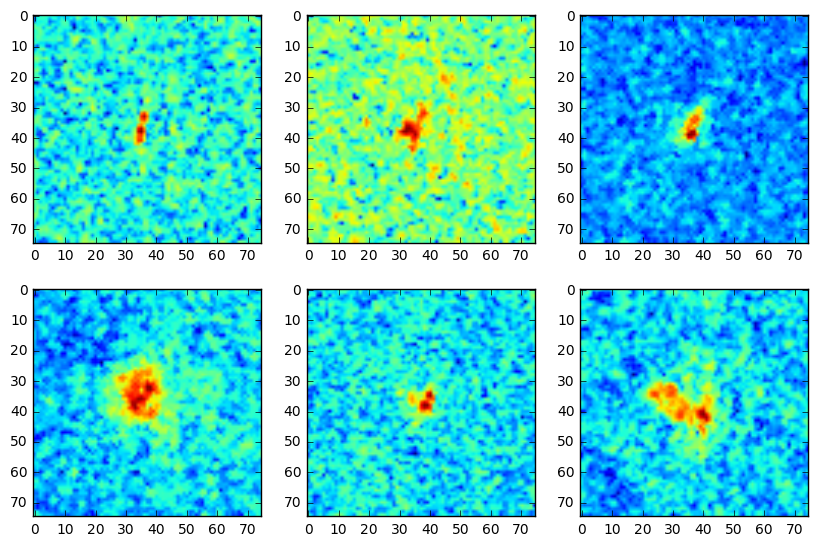

In [27]:
# Plot band_1 for iceburgs
band = 0
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,band]),(75,75))
    ax.imshow(arr)

#### Ships: Band_1

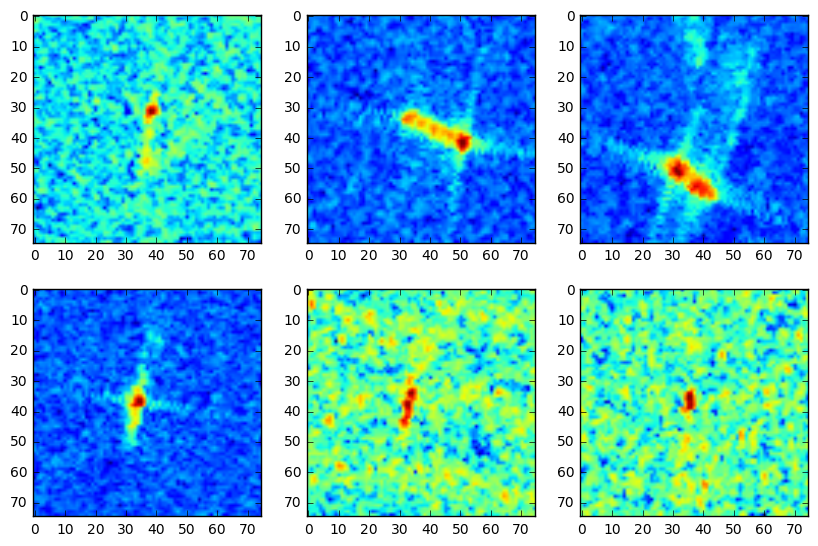

In [28]:
# Plot band_1 for ships
band = 0
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,band]),(75,75))
    ax.imshow(arr)

#### Icebergs: Band_2

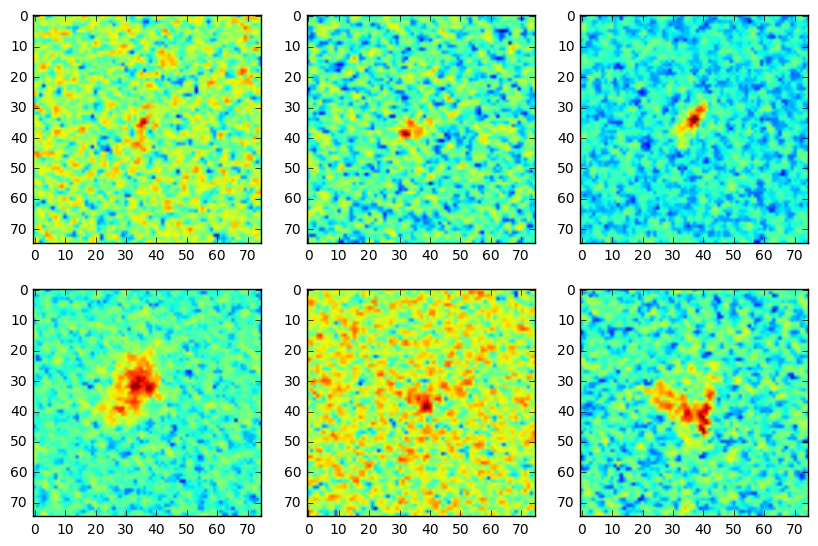

In [29]:
# Plot band_2 for iceburgs
band = 1
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,band]),(75,75))
    ax.imshow(arr)

#### Ships: Band_2

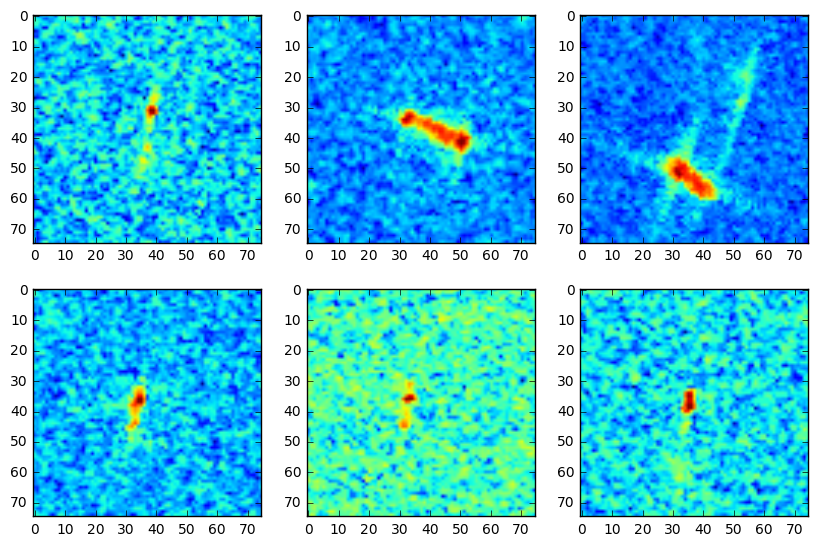

In [30]:
# Plot band_2 for ships
band = 1
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,band]),(75,75))
    ax.imshow(arr)

### Plot with a Gradient Magnitude filter applied
This filter defines edges

In [35]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

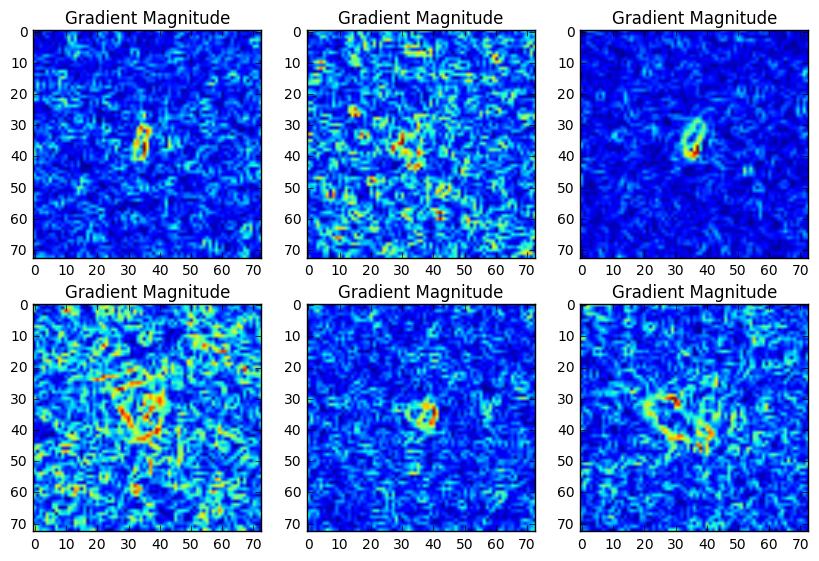

In [36]:
# Plot band_1 for icebergs
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arrx = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)),xder,mode='valid')
    arry = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)),yder,mode='valid')
    ax.imshow(np.hypot(arrx,arry))
    ax.set_title('Gradient Magnitude')
    
plt.show()

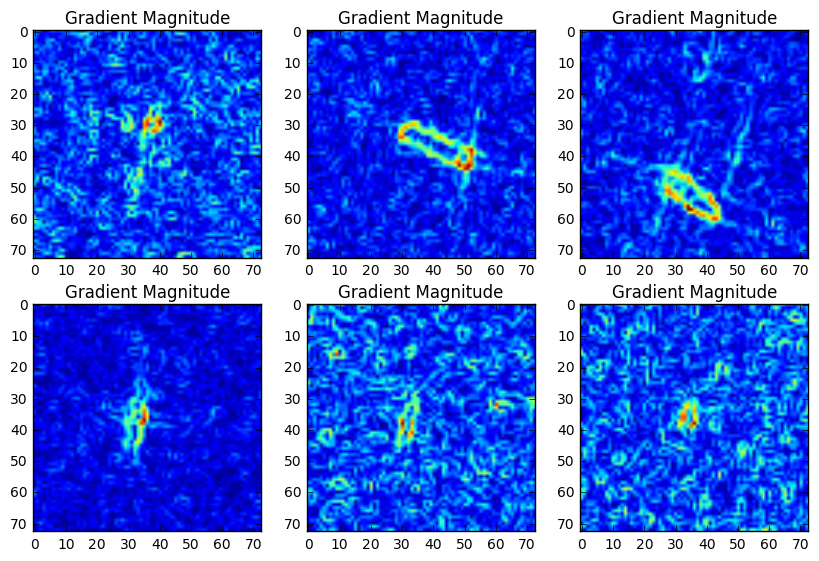

In [37]:
# Plot band_1 for ships
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arrx = signal.convolve2d(np.reshape(np.array(ships.iloc[i,0]),(75,75)),xder,mode='valid')
    arry = signal.convolve2d(np.reshape(np.array(ships.iloc[i,0]),(75,75)),yder,mode='valid')
    ax.imshow(np.hypot(arrx,arry))
    ax.set_title('Gradient Magnitude')
    
plt.show()